<a href="https://colab.research.google.com/github/mohammadsanatabassum/labs-and-projects-on-aiml-/blob/main/Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 4: Perceptron and Gradient Descent
Lab 2: Introduction to Gradient Descent

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(55)
np.random.seed(55)

In [5]:
def eval_2nd_degree(coeffs, x):

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

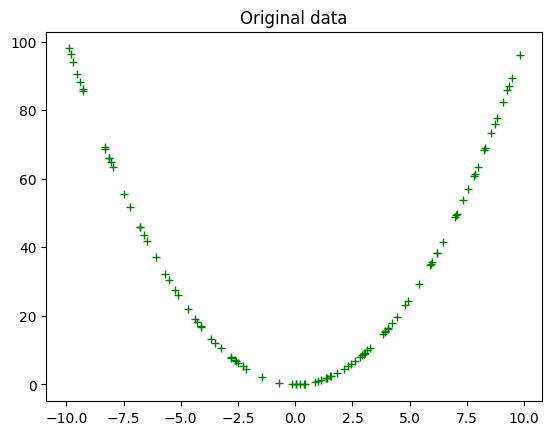

In [6]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [11]:
def eval_2nd_degree_jitter(coeffs, x, j):


    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.5)
    xs.append(x)
    ys.append(y)


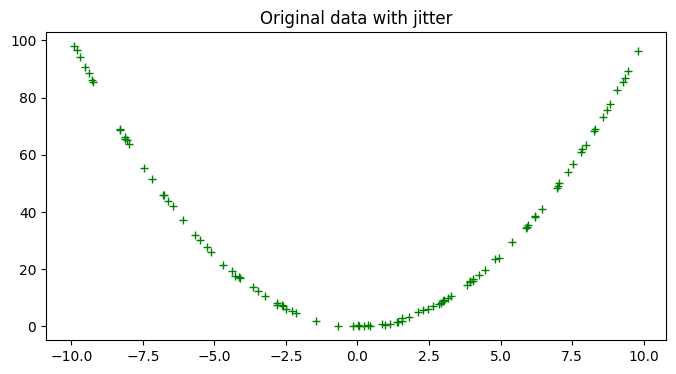

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()


In [15]:
import numpy as np

def loss_mse(ys, y_bar):


    ys = np.array(ys)
    y_bar = np.array(y_bar)
    return np.mean((ys - y_bar) ** 2)


In [16]:
def loss_mse(ys, y_bar):


    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

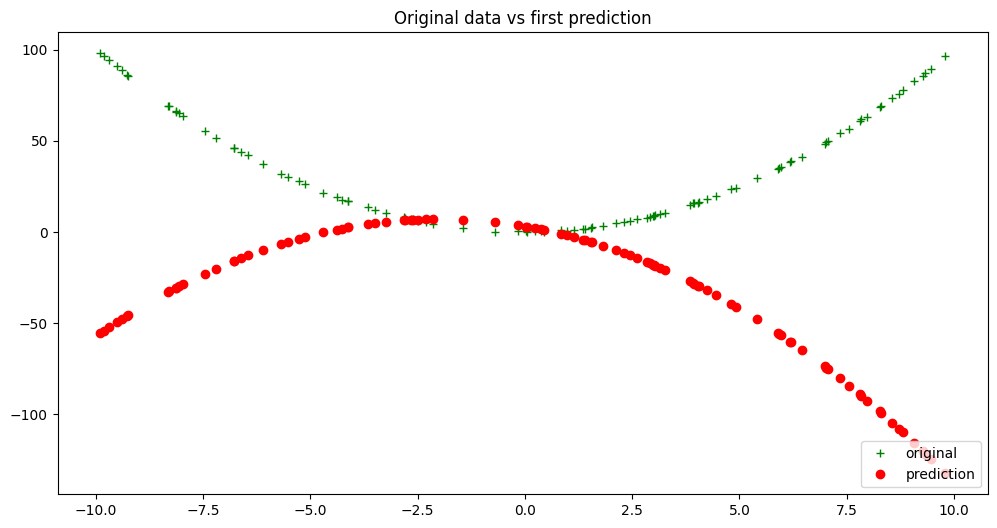

In [17]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [18]:
import numpy as np

def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):

    # Evaluate predicted y values
    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    # Convert to NumPy arrays for vectorized operations
    x_vals = np.array(hundred_xs)
    y_vals = np.array(ys)
    y_pred = np.array(y_bars)

    # Calculate residuals
    residuals = y_vals - y_pred

    # Compute gradients for a, b, and c
    gradient_a = (-2 / len(x_vals)) * np.sum((x_vals ** 2) * residuals)
    gradient_b = (-2 / len(x_vals)) * np.sum(x_vals * residuals)
    gradient_c = (-2 / len(x_vals)) * np.sum(residuals)

    return gradient_a, gradient_b, gradient_c


In [20]:
# Initial calculations for loss
initial_y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)  # Predictions using initial coefficients
initial_model_loss = loss_mse(ys, initial_y_bar)  # Calculate the initial loss
print(f"Initial model loss: {initial_model_loss}")

# Calculate gradients
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

# Learning rate
lr = 0.0005

# Update coefficients using gradient descent
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

# New model coefficients
new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# Recalculate predictions and loss
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

# Compare losses
print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")


Initial model loss: 8561.697781513112
New model coeffs: (3.0984704338148834, -3.8590519633250597, 3.066866458649359)
Now have smaller model loss: 10129.881026229474 vs 8561.697781513112


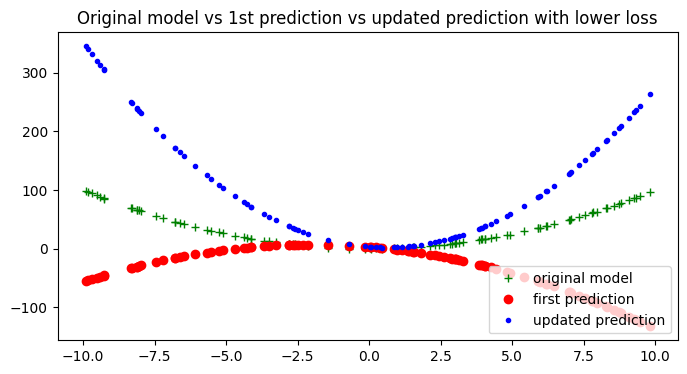

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [24]:
import numpy as np

def calc_gradient_2nd_poly(coeffs, inputs_x, outputs_y):
    inputs_x = np.array(inputs_x)
    outputs_y = np.array(outputs_y)
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    residuals = outputs_y - y_bars
    n = len(inputs_x)

    gradient_a = (-2 / n) * np.sum((inputs_x ** 2) * residuals)
    gradient_b = (-2 / n) * np.sum(inputs_x * residuals)
    gradient_c = (-2 / n) * np.sum(residuals)

    return gradient_a, gradient_b, gradient_c

def update_coefficients(coeffs, gradients, lr):

    return tuple(c - lr * g for c, g in zip(coeffs, gradients))

def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):

    # Calculate gradients
    gradients = calc_gradient_2nd_poly(coeffs, inputs_x, outputs_y)

    # Update coefficients
    new_coeffs = update_coefficients(coeffs, gradients, lr)

    # Evaluate new predictions and loss
    new_y_bar = eval_2nd_degree(new_coeffs, inputs_x)
    updated_loss = loss_mse(outputs_y, new_y_bar)

    return updated_loss, new_coeffs, new_y_bar


In [25]:
def gradient_descent(epochs, lr, initial_coeffs, inputs_x, outputs_y):

    # Validate inputs
    if epochs <= 0 or lr <= 0:
        raise ValueError("Epochs and learning rate must be positive values.")

    # Initialize
    current_coeffs = initial_coeffs
    losses = []

    for epoch in range(epochs):
        # Perform a single gradient descent step
        updated_loss, updated_coeffs, new_y_bar = calc_gradient_2nd_poly_for_GD(
            current_coeffs, inputs_x, outputs_y, lr
        )

        # Update coefficients
        current_coeffs = updated_coeffs
        losses.append(updated_loss)

        # Optional: Log loss at each epoch
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {updated_loss}")

    # Final results
    return updated_loss, current_coeffs, new_y_bar, losses


In [30]:


GD = gradient_descent(epochs=30000, lr=0.0003, initial_coeffs=rand_coeffs, inputs_x=hundred_xs, outputs_y=ys)


Streaming output truncated to the last 5000 lines.
Epoch 25001/30000, Loss: 0.07690565976829407
Epoch 25002/30000, Loss: 0.07690565556651636
Epoch 25003/30000, Loss: 0.07690565136694698
Epoch 25004/30000, Loss: 0.07690564716958564
Epoch 25005/30000, Loss: 0.07690564297443046
Epoch 25006/30000, Loss: 0.07690563878148053
Epoch 25007/30000, Loss: 0.07690563459073446
Epoch 25008/30000, Loss: 0.07690563040219131
Epoch 25009/30000, Loss: 0.07690562621584973
Epoch 25010/30000, Loss: 0.07690562203170857
Epoch 25011/30000, Loss: 0.07690561784976752
Epoch 25012/30000, Loss: 0.07690561367002406
Epoch 25013/30000, Loss: 0.07690560949247786
Epoch 25014/30000, Loss: 0.07690560531712771
Epoch 25015/30000, Loss: 0.07690560114397244
Epoch 25016/30000, Loss: 0.07690559697300996
Epoch 25017/30000, Loss: 0.07690559280424067
Epoch 25018/30000, Loss: 0.07690558863766243
Epoch 25019/30000, Loss: 0.07690558447327478
Epoch 25020/30000, Loss: 0.07690558031107582
Epoch 25021/30000, Loss: 0.07690557615106478
Epoc

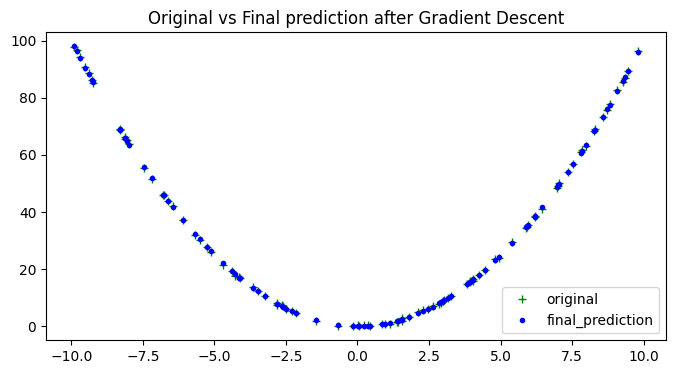

In [31]:
plt.figure(figsize=(8,4))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [32]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (1.000192291586021, -0.0020606580562464883, 0.014776521242999715)
Original Coefficients: [1, 0, 0]


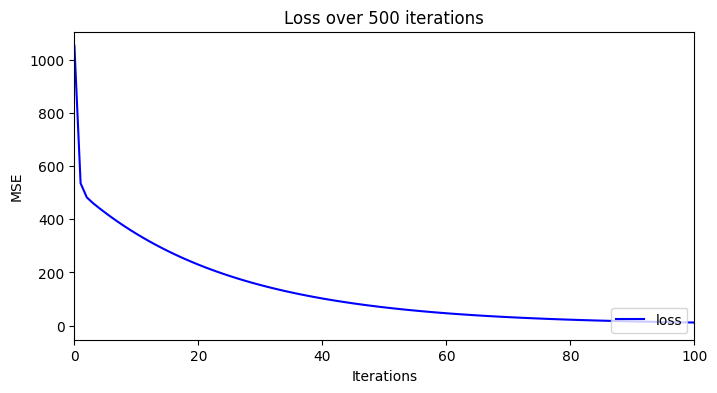

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

Things to try

    Change the coefficients array and try a different polynomial instead of our x2.
    Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
    Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of x2?
    Can you modify the algorithm to find a maxima of a function, instead of a minima?


In [34]:
def eval_3rd_degree(coeffs, inputs_x):

    a, b, c, d = coeffs
    inputs_x = np.array(inputs_x)
    return a * inputs_x**3 + b * inputs_x**2 + c * inputs_x + d


In [40]:
import matplotlib.pyplot as plt

# Plot loss history
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.grid()
    plt.show()



Streaming output truncated to the last 5000 lines.
Epoch 25003/30000, Loss: 167216330.1713821
Epoch 25004/30000, Loss: 167216330.17015705
Epoch 25005/30000, Loss: 167216330.16893268
Epoch 25006/30000, Loss: 167216330.167709
Epoch 25007/30000, Loss: 167216330.16648588
Epoch 25008/30000, Loss: 167216330.1652634
Epoch 25009/30000, Loss: 167216330.16404167
Epoch 25010/30000, Loss: 167216330.16282064
Epoch 25011/30000, Loss: 167216330.16160008
Epoch 25012/30000, Loss: 167216330.16038033
Epoch 25013/30000, Loss: 167216330.1591612
Epoch 25014/30000, Loss: 167216330.1579427
Epoch 25015/30000, Loss: 167216330.1567247
Epoch 25016/30000, Loss: 167216330.1555076
Epoch 25017/30000, Loss: 167216330.15429106
Epoch 25018/30000, Loss: 167216330.15307504
Epoch 25019/30000, Loss: 167216330.1518598
Epoch 25020/30000, Loss: 167216330.15064523
Epoch 25021/30000, Loss: 167216330.14943126
Epoch 25022/30000, Loss: 167216330.14821792
Epoch 25023/30000, Loss: 167216330.1470053
Epoch 25024/30000, Loss: 167216330.

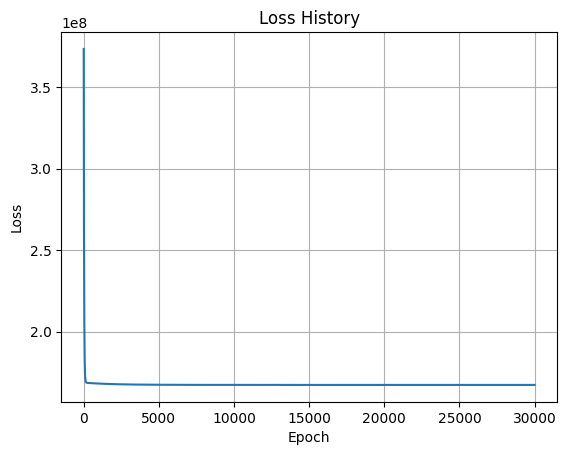

In [43]:
def generate_5th_degree_polynomial(roots, inputs_x):
    inputs_x = np.array(inputs_x)
    y = np.ones_like(inputs_x)
    for r in roots:
        y *= (inputs_x - r)
    return y

# Generate random roots for a 5th-degree polynomial
roots = [-5, -2, 0, 3, 6]
hundred_xs = np.linspace(-10, 10, 100)
ys = generate_5th_degree_polynomial(roots, hundred_xs) + np.random.normal(0, 2, 100)

# Try gradient descent for a 5th-degree polynomial
degree_5_coeffs = np.random.uniform(-1, 1, 6)  # 5th-degree polynomial has 6 coefficients
final_loss, final_coeffs, final_predictions, loss_history = gradient_descent(
    epochs=30000, lr=0.0003, initial_coeffs=degree_5_coeffs, inputs_x=hundred_xs, outputs_y=ys
)

print(f"Final Loss for 5th Degree Polynomial: {final_loss}")
print(f"Final Coefficients for 5th Degree Polynomial: {final_coeffs}")
plot_loss_history(loss_history)


Streaming output truncated to the last 5000 lines.
Epoch 25003/30000, Loss: 167216330.15233532
Epoch 25004/30000, Loss: 167216330.1511206
Epoch 25005/30000, Loss: 167216330.1499062
Epoch 25006/30000, Loss: 167216330.1486928
Epoch 25007/30000, Loss: 167216330.14747977
Epoch 25008/30000, Loss: 167216330.14626753
Epoch 25009/30000, Loss: 167216330.14505586
Epoch 25010/30000, Loss: 167216330.14384484
Epoch 25011/30000, Loss: 167216330.14263448
Epoch 25012/30000, Loss: 167216330.14142478
Epoch 25013/30000, Loss: 167216330.14021578
Epoch 25014/30000, Loss: 167216330.13900727
Epoch 25015/30000, Loss: 167216330.1377995
Epoch 25016/30000, Loss: 167216330.1365925
Epoch 25017/30000, Loss: 167216330.13538602
Epoch 25018/30000, Loss: 167216330.13418007
Epoch 25019/30000, Loss: 167216330.13297492
Epoch 25020/30000, Loss: 167216330.13177043
Epoch 25021/30000, Loss: 167216330.1305665
Epoch 25022/30000, Loss: 167216330.12936315
Epoch 25023/30000, Loss: 167216330.12816066
Epoch 25024/30000, Loss: 167216

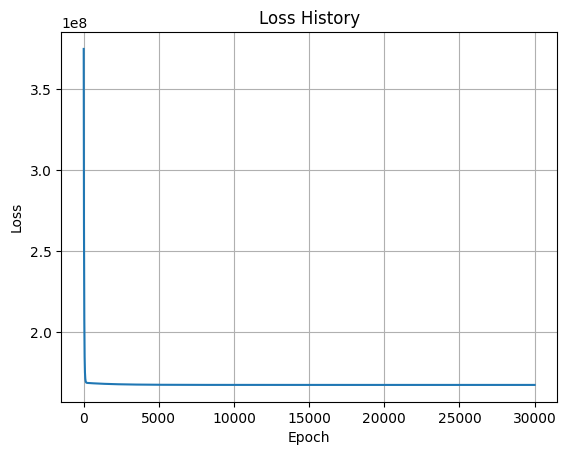

Streaming output truncated to the last 5000 lines.
Epoch 25003/30000, Loss: 167216330.1730749
Epoch 25004/30000, Loss: 167216330.17184904
Epoch 25005/30000, Loss: 167216330.17062372
Epoch 25006/30000, Loss: 167216330.16939908
Epoch 25007/30000, Loss: 167216330.16817498
Epoch 25008/30000, Loss: 167216330.1669519
Epoch 25009/30000, Loss: 167216330.16572922
Epoch 25010/30000, Loss: 167216330.1645072
Epoch 25011/30000, Loss: 167216330.1632857
Epoch 25012/30000, Loss: 167216330.16206512
Epoch 25013/30000, Loss: 167216330.16084498
Epoch 25014/30000, Loss: 167216330.15962562
Epoch 25015/30000, Loss: 167216330.15840685
Epoch 25016/30000, Loss: 167216330.15718865
Epoch 25017/30000, Loss: 167216330.15597135
Epoch 25018/30000, Loss: 167216330.15475452
Epoch 25019/30000, Loss: 167216330.15353832
Epoch 25020/30000, Loss: 167216330.15232274
Epoch 25021/30000, Loss: 167216330.15110794
Epoch 25022/30000, Loss: 167216330.14989367
Epoch 25023/30000, Loss: 167216330.14868006
Epoch 25024/30000, Loss: 1672

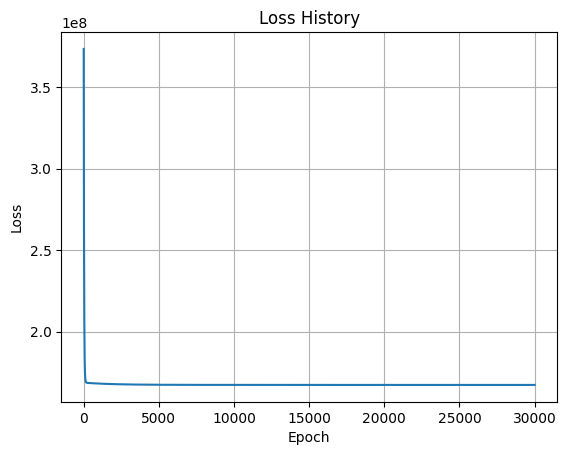

Streaming output truncated to the last 5000 lines.
Epoch 25003/30000, Loss: 167216330.17142445
Epoch 25004/30000, Loss: 167216330.17019936
Epoch 25005/30000, Loss: 167216330.1689749
Epoch 25006/30000, Loss: 167216330.16775128
Epoch 25007/30000, Loss: 167216330.16652814
Epoch 25008/30000, Loss: 167216330.16530564
Epoch 25009/30000, Loss: 167216330.16408384
Epoch 25010/30000, Loss: 167216330.16286275
Epoch 25011/30000, Loss: 167216330.1616423
Epoch 25012/30000, Loss: 167216330.16042247
Epoch 25013/30000, Loss: 167216330.15920326
Epoch 25014/30000, Loss: 167216330.15798473
Epoch 25015/30000, Loss: 167216330.15676683
Epoch 25016/30000, Loss: 167216330.1555496
Epoch 25017/30000, Loss: 167216330.15433303
Epoch 25018/30000, Loss: 167216330.15311715
Epoch 25019/30000, Loss: 167216330.15190184
Epoch 25020/30000, Loss: 167216330.1506871
Epoch 25021/30000, Loss: 167216330.14947328
Epoch 25022/30000, Loss: 167216330.1482598
Epoch 25023/30000, Loss: 167216330.14704713
Epoch 25024/30000, Loss: 16721

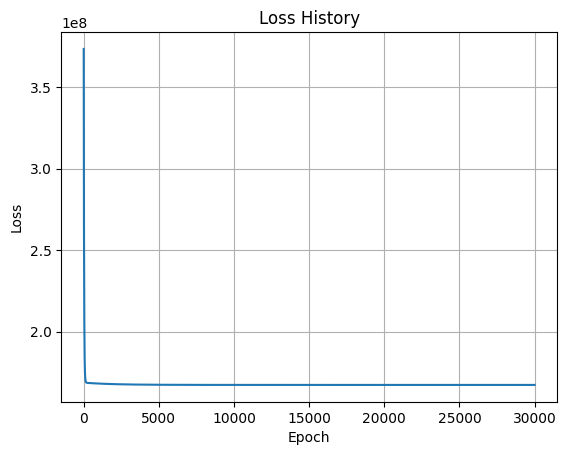

In [44]:
initializations = [np.random.uniform(-10, 10, 6),  # Very large random coefficients
                   np.random.uniform(-1, 1, 6),   # Small random coefficients
                   np.zeros(6)]                  # Starting at zero

for init in initializations:
    print(f"\nRunning gradient descent with initialization: {init}")
    final_loss, final_coeffs, final_predictions, loss_history = gradient_descent(
        epochs=30000, lr=0.0003, initial_coeffs=init, inputs_x=hundred_xs, outputs_y=ys
    )
    print(f"Final Loss: {final_loss}")
    print(f"Final Coefficients: {final_coeffs}")
    plot_loss_history(loss_history)
